In [1]:
# carga de paquetes
import sys
sys.path.append("../scripts/")
from funciones_paralectura import carga_de_datos, transformar_datos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


In [2]:
# carga de caminata aleatoria
documento = '../../Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post/data/Matlab/RW5.mat'
documento_2 = '../../Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post/data/Matlab/RW4.mat'
comentarios = ['discharge (random walk)',
               'rest (random walk)',
               'rest post random walk discharge']
comentario_final = ['charge (after random walk discharge)']
t, v, c, temp, T = carga_de_datos(documento, comentarios, comentario_final, nofinal=False)
t_2, v_2, c_2, temp_2, T_2 = carga_de_datos(documento_2, comentarios, comentario_final, nofinal=False)

carga de datos de bateria RW5.mat
tiempo len: 743
voltage len: 743
current len: 743
temperatura len: 743
Tiempo absoluto len: 743
carga de datos de bateria RW4.mat
tiempo len: 728
voltage len: 728
current len: 728
temperatura len: 728
Tiempo absoluto len: 728


In [3]:
[arr_dif_salto_c,
 arr_pot_salto,
 arr_centro_salto_c,
 arr_ciclo_salto,
 arr_voltaje_salto,
 arr_corriente_salto,
 arr_tiempo_salto,
 arr_temperatura_salto] = transformar_datos(t, v, c, temp, T)


saltos = {'ciclo': arr_ciclo_salto,
          'energia': arr_pot_salto,
          'magnitud': arr_dif_salto_c,
          'media': arr_centro_salto_c}

df = pd.DataFrame(saltos, columns=['ciclo', 'energia', 'magnitud', 'media'])

df['voltaje'] = [x for x in arr_voltaje_salto]
df['corriente'] = [x for x in arr_corriente_salto]
df['temperatura'] = [x for x in arr_temperatura_salto]
df['tiempo'] = [x for x in arr_tiempo_salto]
df['temp_ini'] = [x[0] for x in df['temperatura']]

df = df.reset_index()
print(len(df))
# df = df.iloc[np.where(df['energia'] > 100)]
# print(len(df))
df.head()


ciclo 741     4931


,index,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo,temp_ini
0,0,1,0.614047,4.005,2.0025,"[4.199, 4.199, 3.833, 3.809, 3.801, 3.795, 3.7...","[0.0, 0.0, 4.005, 3.999, 4.0, 3.999, 4.0, 4.0,...","[20.61039, 20.61039, 20.61039, 20.62594, 20.62...","[274884.25, 274884.5, 274884.54, 274885.540000...",20.61039
1,1,1,4266.690109,2.007,1.0035,"[3.512, 3.817, 3.842, 3.683, 3.688, 3.693, 3.6...","[4.0, 0.0, 0.0, 2.007, 2.0, 2.0, 2.0, 2.0, 2.0...","[28.18093, 28.18093, 28.18093, 28.18093, 28.21...","[275184.5, 275184.50999999995, 275184.7, 27518...",28.18093
2,2,1,6510.697143,1.503,0.7515,"[3.72, 3.868, 3.879, 3.763, 3.762, 3.763, 3.76...","[2.0, 0.0, 0.0, 1.503, 1.5, 1.5, 1.5, 1.5, 1.5...","[28.36748, 28.36748, 28.36748, 28.36748, 28.35...","[275484.7, 275484.71, 275485.35, 275485.39, 27...",28.36748
3,3,1,8200.072656,2.504,1.2520,"[3.733, 3.846, 3.854, 3.657, 3.652, 3.65, 3.64...","[1.5, 0.0, 0.0, 2.504, 2.5, 2.5, 2.5, 2.499, 2...","[27.24822, 27.24822, 27.23267, 27.23267, 27.23...","[275785.35, 275785.36, 275785.81, 275785.85, 2...",27.24822
4,4,1,10884.859898,0.504,0.2520,"[3.543, 3.731, 3.747, 3.708, 3.711, 3.715, 3.7...","[2.5, 0.0, 0.0, 0.504, 0.5, 0.5, 0.5, 0.5, 0.5...","[28.07212, 28.07212, 28.07212, 28.07212, 28.07...","[276085.81, 276085.82, 276086.28, 276086.33, 2...",28.07212


2517


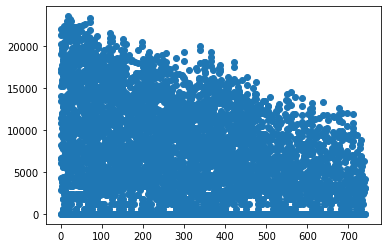

In [4]:
plt.scatter(df['ciclo'], df['energia'])

df = df.iloc[np.where(df['energia'] < 7000)]
print(len(df))
df = df.reset_index()


In [5]:
[arr_dif_salto_c,
 arr_pot_salto,
 arr_centro_salto_c,
 arr_ciclo_salto,
 arr_voltaje_salto,
 arr_corriente_salto,
 arr_tiempo_salto,
 arr_temperatura_salto] = transformar_datos(t_2, v_2, c_2, temp_2, T_2)

saltos = {'ciclo': arr_ciclo_salto,
          'energia': arr_pot_salto,
          'magnitud': arr_dif_salto_c,
          'media': arr_centro_salto_c}
df_2 = pd.DataFrame(saltos, columns=['ciclo', 'energia', 'magnitud', 'media'])
df_2['voltaje'] = [x for x in arr_voltaje_salto]
df_2['corriente'] = [x for x in arr_corriente_salto]
df_2['temperatura'] = [x for x in arr_temperatura_salto]
df_2['tiempo'] = [x for x in arr_tiempo_salto]
df_2['temp_ini'] = [x[0] for x in df_2['temperatura']]


df_2 = df_2.reset_index()
print(len(df))
# df_2 = df_2.iloc[np.where(df_2['energia'] > 100)]
# print(len(df_2))
df_2 = df_2.iloc[np.where(df_2['energia'] < 7000)]
print(len(df_2))
df_2.head()
df_2 = df_2.reset_index()


ciclo 726     2517
2457


In [6]:
# extraccion de caracteristicas
from preparacion_entrenamiento import *
from extraccion_caracteristicas import *

In [7]:
# obtener features

#RW3
df["ene_total"] = energia_total(df["energia"],df["ciclo"])

mag = Mg_rel(df['magnitud'])
df["Mag_rel"] = mag[0] #magnitud relativa a la anterior
df["Mediana_rel"] = mag[1] #mediana relativa
df["Mag_rel_abs"] = np.absolute(mag[0]) #magnitud relativa a la anterior
df["Mediana_rel_abs"] = np.absolute(mag[1]) #mediana relativa

#df["F1"] = [np.mean(x[:1]) for x in primera_derivada(df["voltaje"])] #primera derivada
df["F1"] = primera_derivada(df["voltaje"],df["tiempo"])
#df["F2"] = segunda_derivada(df["voltaje"]) #segunda derivada
df["F2"] = segunda_derivada(df["voltaje"],df["tiempo"]) 
df["F3"] = deltaT(df["temp_ini"],df["magnitud"])  #Diferencia de temperatura
df["F4"] = primera_derivada_RC(df["voltaje"])  # primera derivada efecto capacitivo
df["F5"] = segunda_derivada_RC(df["voltaje"])  # segunda derivada efecto capacitivo
RC_test = RC(df["voltaje"],df["tiempo"],df["ciclo"])
df["F6"] = RC_test[0]  # circuito RC
df["F7"] = potencia_instantanea_salto(df['voltaje'], df['corriente'], limite=1) #Potencia instantanea
df["F8"] = np.round(df["F7"].values/df["Mag_rel"].values,3)
df["F9"] =  np.round(df["F7"].values/df["Mag_rel_abs"].values,3)
df['F10'] = diferencia_voltaje(df['voltaje'], df['corriente'])
df['F11'] = diferencia_voltaje2(df['voltaje'], df['corriente'])


#RW5
df_2["ene_total"] = energia_total(df_2["energia"],df_2["ciclo"])

mag = Mg_rel(df_2['magnitud'])
df_2["Mag_rel"] = mag[0] #magnitud relativa a la anterior
df_2["Mediana_rel"] = mag[1] #mediana relativa
df_2["Mag_rel_abs"] = np.absolute(mag[0]) #magnitud relativa a la anterior
df_2["Mediana_rel_abs"] = np.absolute(mag[1]) #mediana relativa

#df_2["F1"] = [np.mean(x[:1]) for x in primera_derivada(df_2["voltaje"])]
df_2["F1"] = primera_derivada(df_2["voltaje"],df_2["tiempo"])
#df_2["F2"] = segunda_derivada(df_2["voltaje"]) #segunda derivada
df_2["F2"] = segunda_derivada(df_2["voltaje"],df_2["tiempo"]) 
df_2["F3"] = deltaT(df_2["temp_ini"],df_2["magnitud"])
df_2["F4"] = primera_derivada_RC(df_2["voltaje"])  # primera derivada efecto capacitivo
df_2["F5"] = segunda_derivada_RC(df_2["voltaje"])  # segunda derivada efecto capacitivo
RC_test = RC(df_2["voltaje"],df_2["tiempo"],df_2["ciclo"])
df_2["F6"] = RC_test[0]  # circuito RC
df_2["F7"] = potencia_instantanea_salto(df_2['voltaje'], df_2['corriente'], limite=1) #Potencia instantanea
df_2["F8"] = np.round(df_2["F7"].values/df_2["Mag_rel"].values,3)
df_2["F9"] = np.round(df_2["F7"].values/df_2["Mag_rel_abs"].values,3)
df_2['F10'] = diferencia_voltaje(df_2['voltaje'], df_2['corriente'])
df_2['F11'] = diferencia_voltaje2(df_2['voltaje'], df_2['corriente'])
#Cambio de labels para etiquetar

sep = 8
df["clase"] = ChangeLabel(df['ciclo'],sep)
df_2["clase"] = ChangeLabel(df_2["ciclo"],sep)

print(len(df))
print(len(df_2))

df = pd.concat((df, df_2))


#print(df["F7"].values/df["Mag_rel"].values)
#df.values[1393,:]


/home/martin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/martin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


2517
2457


/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide
/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide


In [8]:
print(len(df))
for i, col in enumerate(df.columns):
    print('{} columna {}'.format(i, col))

4974
0 columna level_0
1 columna index
2 columna ciclo
3 columna energia
4 columna magnitud
5 columna media
6 columna voltaje
7 columna corriente
8 columna temperatura
9 columna tiempo
10 columna temp_ini
11 columna ene_total
12 columna Mag_rel
13 columna Mediana_rel
14 columna Mag_rel_abs
15 columna Mediana_rel_abs
16 columna F1
17 columna F2
18 columna F3
19 columna F4
20 columna F5
21 columna F6
22 columna F7
23 columna F8
24 columna F9
25 columna F10
26 columna F11
27 columna clase


A continuación, se toman un arreglo al azar de ciclos repartidos uniformemente como entrenamiento, correspondiente a una proporción del 70% de los ciclos, el resto corresponde a datos de testeo.

741
395.463963963964
360.5356454720617
741


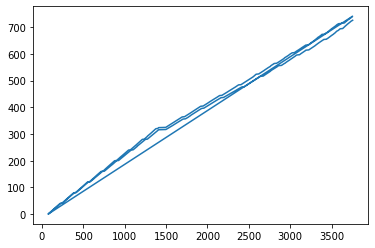

In [9]:
tiempo_abs = []
ciclos = []
for index, row in df.iterrows():
    tiempo_abs.append(np.min(row.tiempo) / 3600)
    ciclos.append(row.ciclo)

plt.plot(tiempo_abs, ciclos)

ciclos_index = np.unique(df.ciclo)

# tomar una seleccion aleatoria uniforme de ciclos
train_ciclos_index = np.random.choice(ciclos_index,
                                      size=round(len(ciclos_index) * 0.7),
                                      replace=False)
train_ciclos_index = np.sort(train_ciclos_index)

mask = np.ones(len(ciclos_index), dtype=bool)
# print(ciclos_index)
# print(train_ciclos_index)
mask[train_ciclos_index - 1] = False
test_ciclos_index = ciclos_index[mask]
test_ciclos_index = np.sort(test_ciclos_index)

print(len(ciclos_index))
print(np.mean(test_ciclos_index))
print(np.mean(train_ciclos_index))
print(len(test_ciclos_index) + len(train_ciclos_index))

Asociar el ciclo con un estado del SOH (un punto en la curva)

carga de datos de bateria RW5.mat
tiempo len: 42
voltage len: 42
current len: 42
temperatura len: 42
Tiempo absoluto len: 42
carga de datos de bateria RW4.mat
tiempo len: 38
voltage len: 38
current len: 38
temperatura len: 38
Tiempo absoluto len: 38


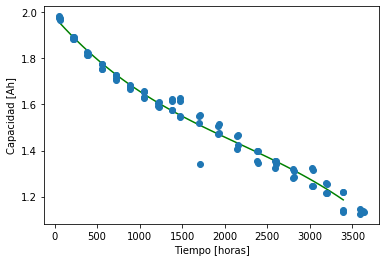

In [10]:
#RW3
lista = [str('reference discharge')]
final = [str('rest post reference discharge')]
[t_descarga, v_descarga, c_descarga,
 temp_descarga, T_descarga] = carga_de_datos(documento, lista, final, nofinal=True)

# integrar la descarga
energia_entregada = []
T = []
for k in t_descarga.keys():
    energia_entregada.append(sum(c_descarga[k]) / 360)
    T.append(np.min(t_descarga[k]) / 3600)

#RW5
lista_2 = [str('reference discharge')]
final_2 = [str('rest post reference discharge')]
[t_descarga_2, v_descarga_2, c_descarga_2,
 temp_descarga_2, T_descarga_2] = carga_de_datos(documento_2, lista_2, final_2, nofinal=True)

# integrar la descarga
energia_entregada_2 = []
T_2 = []
for k in t_descarga_2.keys():
    energia_entregada_2.append(sum(c_descarga_2[k]) / 360)
    T_2.append(np.min(t_descarga[k]) / 3600)

energia_entregada = np.hstack((energia_entregada, energia_entregada_2))
T = np.hstack((T, T_2))

# calculate polynomial
z = np.polyfit(T, energia_entregada, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(T[0], T[-1], 50)
y_new = f(x_new)

plt.plot(x_new, y_new, 'g')
plt.plot(T,energia_entregada,'o')
# plt.plot(T_2,energia_entregada_2,'o')
plt.ylabel('Capacidad [Ah]')
plt.xlabel('Tiempo [horas]')
plt.show()


Hay que hacer una relación entre los ciclos y el tiempo, luego de eso con el SOH.

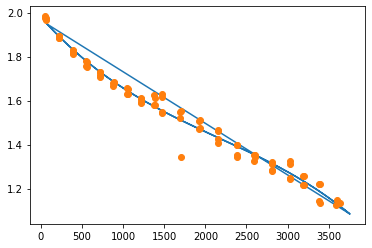

In [11]:
SOH_new = f(tiempo_abs)
plt.plot(tiempo_abs, SOH_new)
plt.plot(T,energia_entregada,'o')

In [12]:
df['SOH'] = SOH_new
df = df.drop(columns=['index', 'level_0'])
df.head()

,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo,temp_ini,ene_total,...,F4,F5,F6,F7,F8,F9,F10,F11,clase,SOH
0,1,0.614047,4.005,2.0025,"[4.199, 4.199, 3.833, 3.809, 3.801, 3.795, 3.7...","[0.0, 0.0, 4.005, 3.999, 4.0, 3.999, 4.0, 4.0,...","[20.61039, 20.61039, 20.61039, 20.62594, 20.62...","[274884.25, 274884.5, 274884.54, 274885.540000...",20.61039,0.614047,...,0.000000,0.000000,0.00000,16.816995,4.199,4.199,-0.366,-0.366,1,1.947961
1,1,4266.690109,2.007,1.0035,"[3.512, 3.817, 3.842, 3.683, 3.688, 3.693, 3.6...","[4.0, 0.0, 0.0, 2.007, 2.0, 2.0, 2.0, 2.0, 2.0...","[28.18093, 28.18093, 28.18093, 28.18093, 28.21...","[275184.5, 275184.50999999995, 275184.7, 27518...",28.18093,4266.690109,...,0.000213,-0.000027,70.30368,7.710894,-3.859,3.859,0.171,-0.159,1,1.947928
2,1,6510.697143,1.503,0.7515,"[3.72, 3.868, 3.879, 3.763, 3.762, 3.763, 3.76...","[2.0, 0.0, 0.0, 1.503, 1.5, 1.5, 1.5, 1.5, 1.5...","[28.36748, 28.36748, 28.36748, 28.36748, 28.35...","[275484.7, 275484.71, 275485.35, 275485.39, 27...",28.36748,6510.697143,...,0.000107,-0.000034,26.98008,5.830137,-11.568,11.568,0.043,-0.116,1,1.947894
3,2,0.397476,2.503,1.2515,"[4.199, 4.199, 3.97, 3.956, 3.952, 3.948, 3.94...","[0.0, 0.0, 2.503, 2.5, 2.499, 2.5, 2.5, 2.5, 2...","[20.17513, 20.17513, 20.17513, 20.17513, 20.15...","[289066.76999999996, 289066.96, 289067.0, 2890...",20.17513,6511.094620,...,0.000000,0.000000,0.00000,10.510097,10.510,10.510,-0.229,-0.229,1,1.946380
4,2,2846.328689,3.001,1.5005,"[3.731, 3.93, 3.957, 3.697, 3.684, 3.682, 3.68...","[2.5, 0.0, 0.0, 3.001, 3.0, 3.0, 3.0, 3.0, 3.0...","[23.20645, 23.20645, 23.20645, 23.20645, 23.20...","[289366.96, 289366.97000000003, 289367.11, 289...",23.20645,9357.025833,...,0.000000,0.000000,0.00000,11.874957,23.845,23.845,-0.034,-0.260,1,1.946347


In [13]:
# tomamos los ciclos de entrenamiento y test del dataframe
df_test = pd.DataFrame()
df = df.reset_index()
for idx in np.sort(test_ciclos_index):
    print('\r {}   '.format(idx), end='')
    df_test = pd.concat([df_test, df.iloc[np.where(df.ciclo == idx)]])
df_test = df_test.reset_index()
df_test = df_test.drop(columns='index')
df_test

 735   

,level_0,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo,temp_ini,...,F4,F5,F6,F7,F8,F9,F10,F11,clase,SOH
0,16,6,0.083578,0.503,0.2515,"[4.199, 4.199, 4.154, 4.151, 4.15, 4.149, 4.14...","[0.0, 0.0, 0.503, 0.499, 0.5, 0.5, 0.5, 0.5, 0...","[20.54821, 20.54821, 20.54821, 20.54821, 20.54...","[340930.58, 340931.25, 340931.29000000004, 340...",20.54821,...,0.000000,0.000000,0.00000,2.112097,-0.604,0.604,-0.045,-0.045,1,1.940627
1,17,6,617.803123,3.505,1.7525,"[4.1, 4.14, 4.146, 3.83, 3.811, 3.805, 3.8, 3....","[0.499, 0.0, 0.0, 3.505, 3.5, 3.5, 3.5, 3.5, 3...","[20.68812, 20.68812, 20.70366, 20.70366, 20.70...","[341231.25, 341231.26, 341231.45999999996, 341...",20.68812,...,0.000000,0.000000,0.00000,14.531730,4.841,4.841,-0.270,-0.316,1,1.940594
2,18,6,4411.915365,1.003,0.5015,"[3.56, 3.829, 3.856, 3.776, 3.783, 3.789, 3.79...","[3.501, 0.0, 0.0, 1.003, 1.0, 0.999, 1.0, 1.0,...","[26.39323, 26.39323, 26.39323, 26.39323, 26.39...","[341531.45999999996, 341531.47, 341531.6100000...",26.39323,...,0.000269,-0.000023,73.43208,3.867568,-1.546,1.546,0.216,-0.080,1,1.940561
3,19,6,5572.287872,0.506,0.2530,"[3.868, 3.943, 3.951, 3.911, 3.912, 3.912, 3.9...","[0.999, 0.0, 0.0, 0.506, 0.5, 0.5, 0.5, 0.5, 0...","[25.6626, 25.6626, 25.6626, 25.6626, 25.64706,...","[341831.61000000004, 341831.62, 341832.81, 341...",25.66260,...,0.000083,-0.000012,40.59968,1.999206,-4.023,4.023,0.043,-0.040,1,1.940528
4,20,6,6160.207211,0.504,0.2520,"[3.918, 3.956, 3.959, 3.918, 3.918, 3.918, 3.9...","[0.499, 0.0, 0.0, 0.504, 0.5, 0.5, 0.5, 0.501,...","[24.41898, 24.41898, 24.41898, 24.41898, 24.40...","[342132.81, 342132.82, 342133.01999999996, 342...",24.41898,...,0.000000,0.000000,0.00000,1.995336,-997.668,997.668,0.000,-0.041,1,1.940495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,2500,734,6282.912290,2.504,1.2520,"[3.742, 3.787, 3.802, 3.543, 3.488, 3.481, 3.4...","[0.5, 0.0, 0.0, 2.504, 2.5, 2.5, 2.501, 2.5, 2...","[30.43074, 30.43074, 30.43074, 30.43074, 30.41...","[13423091.820000002, 13423091.830000002, 13423...",30.43074,...,0.000000,0.000000,0.00000,9.520208,4.760,4.760,-0.199,-0.259,8,1.093105
1492,2501,735,0.164174,1.004,0.5020,"[4.199, 4.198, 4.088, 4.044, 4.04, 4.038, 4.03...","[0.0, 0.0, 1.004, 1.0, 1.0, 1.0, 0.999, 1.0, 1...","[24.51225, 24.51225, 24.51225, 24.51225, 24.51...","[13441879.390000002, 13441879.650000002, 13441...",24.51225,...,0.000000,0.000000,0.00000,4.214792,-2.810,2.810,-0.111,-0.110,8,1.091524
1493,2502,735,1176.348767,1.004,0.5020,"[3.857, 3.952, 4.007, 3.897, 3.86, 3.859, 3.85...","[1.0, 0.0, 0.0, 1.004, 1.0, 1.0, 1.0, 1.001, 0...","[25.3517, 25.3517, 25.3517, 25.3517, 25.36724,...","[13442179.650000002, 13442179.660000002, 13442...",25.35170,...,0.000000,0.000000,0.00000,4.023028,inf,inf,0.040,-0.110,8,1.091499
1494,2503,735,2321.269456,0.504,0.2520,"[3.781, 3.876, 3.91, 3.859, 3.854, 3.856, 3.85...","[0.999, 0.0, 0.0, 0.504, 0.5, 0.5, 0.5, 0.499,...","[26.20669, 26.20669, 26.20669, 26.20669, 26.20...","[13442480.740000002, 13442480.750000002, 13442...",26.20669,...,0.000070,-0.000007,90.49608,1.970640,-3.941,3.941,0.078,-0.051,8,1.091473


In [14]:
# tomamos los ciclos de entrenamiento y test del dataframe
df_train = pd.DataFrame()
for idx in np.sort(train_ciclos_index):
    print('\r {}   '.format(idx), end='')
    df_train = pd.concat([df_train, df.iloc[np.where(df.ciclo == idx)]])
df_train = df_train.reset_index()
df_train = df_train.drop(columns='index')
print(df_train.shape)
df_train

 741   (3478, 28)


,level_0,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo,temp_ini,...,F4,F5,F6,F7,F8,F9,F10,F11,clase,SOH
0,0,1,0.614047,4.005,2.0025,"[4.199, 4.199, 3.833, 3.809, 3.801, 3.795, 3.7...","[0.0, 0.0, 4.005, 3.999, 4.0, 3.999, 4.0, 4.0,...","[20.61039, 20.61039, 20.61039, 20.62594, 20.62...","[274884.25, 274884.5, 274884.54, 274885.540000...",20.61039,...,0.000000,0.000000,0.00000,16.816995,4.199,4.199,-0.366,-0.366,1,1.947961
1,1,1,4266.690109,2.007,1.0035,"[3.512, 3.817, 3.842, 3.683, 3.688, 3.693, 3.6...","[4.0, 0.0, 0.0, 2.007, 2.0, 2.0, 2.0, 2.0, 2.0...","[28.18093, 28.18093, 28.18093, 28.18093, 28.21...","[275184.5, 275184.50999999995, 275184.7, 27518...",28.18093,...,0.000213,-0.000027,70.30368,7.710894,-3.859,3.859,0.171,-0.159,1,1.947928
2,2,1,6510.697143,1.503,0.7515,"[3.72, 3.868, 3.879, 3.763, 3.762, 3.763, 3.76...","[2.0, 0.0, 0.0, 1.503, 1.5, 1.5, 1.5, 1.5, 1.5...","[28.36748, 28.36748, 28.36748, 28.36748, 28.35...","[275484.7, 275484.71, 275485.35, 275485.39, 27...",28.36748,...,0.000107,-0.000034,26.98008,5.830137,-11.568,11.568,0.043,-0.116,1,1.947894
3,2517,1,0.614707,4.002,2.0010,"[4.199, 4.199, 3.84, 3.814, 3.807, 3.8, 3.795,...","[0.0, 0.0, 4.002, 4.0, 4.0, 4.0, 4.001, 4.001,...","[21.64345, 21.64345, 21.64345, 21.64345, 21.64...","[281556.4, 281556.56000000006, 281556.6, 28155...",21.64345,...,0.000000,0.000000,0.00000,16.804398,4.199,4.199,-0.359,-0.359,1,1.947217
4,2518,1,4268.008336,0.505,0.2525,"[3.514, 3.809, 3.836, 3.799, 3.81, 3.819, 3.82...","[4.0, 0.0, 0.0, 0.505, 0.5, 0.5, 0.5, 0.5, 0.5...","[28.38382, 28.38382, 28.38382, 28.38382, 28.38...","[281856.56000000006, 281856.56999999995, 28185...",28.38382,...,0.000227,-0.000015,120.85736,1.937180,-0.554,0.554,0.285,-0.037,1,1.947183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,2512,740,0.464229,3.002,1.5010,"[4.199, 4.198, 3.866, 3.757, 3.746, 3.737, 3.7...","[0.0, 0.0, 3.002, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0...","[24.5278, 24.51225, 24.51225, 24.5278, 24.5122...","[13502450.740000002, 13502451.310000002, 13502...",24.52780,...,0.000000,0.000000,0.00000,12.602396,-25.054,25.054,-0.333,-0.332,8,1.086394
3474,2513,740,3032.397450,3.503,1.7515,"[3.26, 3.545, 3.648, 3.268, 3.2]","[3.0, 0.0, 0.0, 3.503, 3.5]","[31.52366, 31.52366, 31.52366, 31.52366, 31.53...","[13502751.310000002, 13502751.320000002, 13502...",31.52366,...,0.000000,0.000000,0.00000,12.778944,25.507,25.507,0.008,-0.380,8,1.086368
3475,2514,741,0.464418,3.004,1.5020,"[4.199, 4.198, 3.865, 3.755, 3.745, 3.736, 3.7...","[0.0, 0.0, 3.004, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0...","[24.3568, 24.3568, 24.34126, 24.34126, 24.3568...","[13515771.040000001, 13515772.240000002, 13515...",24.35680,...,0.000000,0.000000,0.00000,12.610792,-25.272,25.272,-0.334,-0.333,8,1.085259
3476,2515,741,3030.793953,1.002,0.5010,"[3.255, 3.54, 3.661, 3.556, 3.56, 3.574, 3.585...","[3.001, 0.0, 0.0, 1.002, 1.0, 1.0, 1.0, 1.0, 0...","[31.4313, 31.4313, 31.44669, 31.44669, 31.4620...","[13516072.240000002, 13516072.250000002, 13516...",31.43130,...,0.000373,-0.000023,77.26832,3.668322,-1.832,1.832,0.301,-0.105,8,1.085233


Preparar datos para entrenar un regresor

In [85]:
print(df_train.columns)
X_train = df_train.drop(columns=['voltaje', 'ene_total',
                                 'corriente', 'temperatura', 'tiempo', 'temp_ini',
                                 'F1',
                                 'F2',
                                 'F3',
                                 'F4',
                                 'F5',
                                 'F6',
                                 'F7',
                                 'F8',
                                 'F9',
#                                  'F10',
#                                  'F11',
                                 'clase'])
X_train = X_train.reset_index().drop(columns=['index'])
print(X_train.columns)
target_train = df_train['SOH'].values
X_train

Index(['level_0', 'ciclo', 'energia', 'magnitud', 'media', 'voltaje',
       'corriente', 'temperatura', 'tiempo', 'temp_ini', 'ene_total',
       'Mag_rel', 'Mediana_rel', 'Mag_rel_abs', 'Mediana_rel_abs', 'F1', 'F2',
       'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'clase', 'SOH'],
      dtype='object')
Index(['level_0', 'ciclo', 'energia', 'magnitud', 'media', 'Mag_rel',
       'Mediana_rel', 'Mag_rel_abs', 'Mediana_rel_abs', 'F10', 'F11', 'SOH'],
      dtype='object')


,level_0,ciclo,energia,magnitud,media,Mag_rel,Mediana_rel,Mag_rel_abs,Mediana_rel_abs,F10,F11,SOH
0,0,1,0.614047,4.005,2.0025,4.005,2.0025,4.005,2.0025,-0.366,-0.366,1.947961
1,1,1,4266.690109,2.007,1.0035,-1.998,-0.9990,1.998,0.9990,0.171,-0.159,1.947928
2,2,1,6510.697143,1.503,0.7515,-0.504,-0.2520,0.504,0.2520,0.043,-0.116,1.947894
3,2517,1,0.614707,4.002,2.0010,4.002,2.0010,4.002,2.0010,-0.359,-0.359,1.947217
4,2518,1,4268.008336,0.505,0.2525,-3.497,-1.7485,3.497,1.7485,0.285,-0.037,1.947183
...,...,...,...,...,...,...,...,...,...,...,...,...
3473,2512,740,0.464229,3.002,1.5010,-0.503,-0.2515,0.503,0.2515,-0.333,-0.332,1.086394
3474,2513,740,3032.397450,3.503,1.7515,0.501,0.2505,0.501,0.2505,0.008,-0.380,1.086368
3475,2514,741,0.464418,3.004,1.5020,-0.499,-0.2495,0.499,0.2495,-0.334,-0.333,1.085259
3476,2515,741,3030.793953,1.002,0.5010,-2.002,-1.0010,2.002,1.0010,0.301,-0.105,1.085233


Buscar la similitud entre un vector de entrenamiento con uno de test, faltándole datos.

In [86]:
# primer batch de test con todas las características
X_test = df_test.drop(columns=['ciclo', 'voltaje', 'ene_total', 'energia',
                               'corriente', 'temperatura', 'tiempo', 'temp_ini',
                               'F1',
                               'F2',
                               'F3',
                               'F4',
                               'F5',
                               'F6',
                               'F7',
                               'F8',
                               'F9',
#                                'F10',
#                                'F11',
                               'clase',# 'magnitud', 'media', 'Mag_rel', 'Mediana_rel',
                               'Mag_rel_abs','Mediana_rel_abs'])

target_test = df_test['SOH'].values

cota_inf = np.where(target_test > 1.5)
target_test = target_test[cota_inf]
X_test = X_test.iloc[cota_inf]

cota_sup = np.where(target_test < 1.51)
target_test = target_test[cota_sup]
X_test = X_test.iloc[cota_sup]

X_test = X_test.reset_index().drop(columns=['index', 'level_0'])
X_test

,magnitud,media,Mag_rel,Mediana_rel,F10,F11,SOH
0,2.503,1.2515,0.998,0.4990,-0.251,-0.251,1.500102
1,0.504,0.2520,-1.999,-0.9995,0.215,-0.047,1.500087
2,1.001,0.5005,0.497,0.2485,-0.042,-0.092,1.500072
3,1.005,0.5025,0.004,0.0020,0.007,-0.093,1.500057
4,4.003,2.0015,2.998,1.4990,-0.275,-0.376,1.500042
5,2.003,1.0015,-1.999,-0.9995,-0.208,-0.207,1.507109
6,1.504,0.7520,-0.499,-0.2495,0.068,-0.149,1.507094
7,3.503,1.7515,1.999,0.9995,-0.186,-0.340,1.507079
8,0.504,0.2520,-3.000,-1.5000,-0.053,-0.052,1.501296
9,1.002,0.5010,0.498,0.2490,-0.045,-0.104,1.501281


In [87]:
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
X_test = X_test.replace([np.inf, -np.inf], np.nan).dropna()
X_test = X_test.drop(columns=['SOH'])
# X_test = X_test.iloc[np.where(X_test['magnitud'] > 0.8)]
# X_test = X_test.iloc[np.where(X_test['magnitud'] < 1.2)]
# X_test = X_test.drop(columns=['magnitud', 'media', 'Mag_rel', 'Mediana_rel'])
X_test = X_test.drop(columns=['media', 'Mag_rel', 'Mediana_rel'])
X_test = X_test.reset_index().drop(columns='index')
X_train = X_train.reset_index().drop(columns=['index', 'level_0', 'ciclo', 'energia',
                                              'media', 'Mag_rel', 'Mediana_rel',
                                              'Mag_rel_abs', 'Mediana_rel_abs', 'SOH'])
X_test

,magnitud,F10,F11
0,2.503,-0.251,-0.251
1,0.504,0.215,-0.047
2,1.001,-0.042,-0.092
3,1.005,0.007,-0.093
4,4.003,-0.275,-0.376
5,2.003,-0.208,-0.207
6,1.504,0.068,-0.149
7,3.503,-0.186,-0.340
8,0.504,-0.053,-0.052
9,1.002,-0.045,-0.104


In [88]:
# promediar los valores del SOH de entrenamiento
X_train

,magnitud,F10,F11
0,4.005,-0.366,-0.366
1,2.007,0.171,-0.159
2,1.503,0.043,-0.116
3,4.002,-0.359,-0.359
4,0.505,0.285,-0.037
...,...,...,...
3473,3.002,-0.333,-0.332
3474,3.503,0.008,-0.380
3475,3.004,-0.334,-0.333
3476,1.002,0.301,-0.105


In [89]:
magnitud_train = X_train['magnitud']
magnitud_test = X_test['magnitud']

X_train = X_train.drop(columns=['magnitud'])
X_test = X_test.drop(columns=['magnitud'])


from sklearn.decomposition import PCA, KernelPCA

pca = KernelPCA(n_components=2, kernel='rbf').fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print(X_train.shape)
print(magnitud_train.shape)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train['magnitud'] = list(magnitud_train)
X_test['magnitud'] = list(magnitud_test)


(3478, 2)
(3478,)


In [90]:
print(X_test.shape)
print(X_train.shape)


(12, 3)
(3478, 3)


Antes de comparar los vectores, hay que escalar sus parámetros

In [91]:
SOH_predicho = np.array([])
puntos = 10

print(len(X_test))
for index_x, x in X_test.iterrows():
    # buscar los tres más cercanos
    i_min = 1000
    mas_chicos = np.ones((puntos,)) * 1000
    mas_chicos_index = np.ones((puntos,)) * 1000

    
    # tambien hay que considerar que se creaban clusters entre los
    # magnitudes de los saltos, por lo que habria que comparar entre esos datos
    x_train = X_train.iloc[np.where((X_train['magnitud'] < x['magnitud'] + 0.1) & (X_train['magnitud'] > x['magnitud'] - 0.1))]
    
#     print(x[1:].values)
    
#     print(x_train)
    
    for index, train in x_train.iterrows():
        print('\r {} : {}   '.format(index_x, index), end='')
        aux = train - x[1:]
        aux = aux[~np.isnan(aux)]
        
        
        # calculo de distancia
        aux_n = np.linalg.norm(aux)
        
        if aux_n < i_min:
            mas_chicos[-1] = float(aux_n)
            mas_chicos_index[-1] = int(index)
            i_min = np.max(mas_chicos)

            sort_ind = mas_chicos.argsort()
            mas_chicos = mas_chicos[sort_ind]
            mas_chicos_index = mas_chicos_index[sort_ind]
    
    mas_chicos_index = np.array(mas_chicos_index, dtype=int)
    
    ponderador = np.sum(mas_chicos) / mas_chicos
    ponderador = ponderador / np.sum(ponderador)
    
#     print(ponderador)
#     print(mas_chicos)
#     soh_encontrado = np.mean(target_train[mas_chicos_index])
    soh_encontrado = target_train[mas_chicos_index]
#     print(soh_encontrado)
    
#     print(np.mean(soh_encontrado))
#     soh_encontrado = np.sum(target_train[mas_chicos_index] * ponderador)
#     print(np.sum(soh_encontrado))
#     if index_x > 3:
#         break
    
    SOH_predicho = np.hstack((SOH_predicho, soh_encontrado))

12
 6 : 2471   

/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


 11 : 3477   

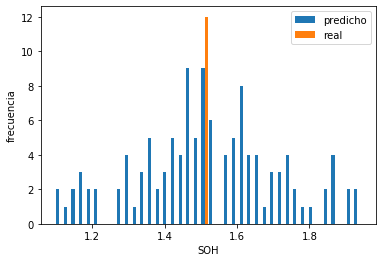

1.5212066273754004 0.19639282908126776
1.5022282417219586 0.0028565248974670695


In [92]:
plt.hist([SOH_predicho, target_test], label=['predicho', 'real'], bins=40)
plt.legend()
plt.xlabel('SOH')
plt.ylabel('frecuencia')
plt.show()

print(np.mean(SOH_predicho[~np.isnan(SOH_predicho)]), np.std(SOH_predicho[~np.isnan(SOH_predicho)]))
print(np.mean(target_test), np.std(target_test))

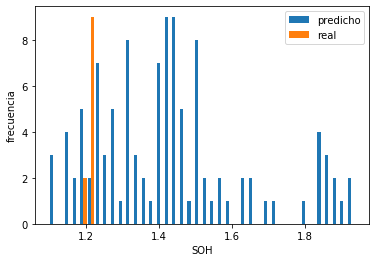

1.43263605445491 0.2075850574518503
1.2061163766261536 0.002721235043377191


In [84]:
plt.hist([SOH_predicho, target_test], label=['predicho', 'real'], bins=40)
plt.legend()
plt.xlabel('SOH')
plt.ylabel('frecuencia')
plt.show()

print(np.mean(SOH_predicho[~np.isnan(SOH_predicho)]), np.std(SOH_predicho[~np.isnan(SOH_predicho)]))
print(np.mean(target_test), np.std(target_test))

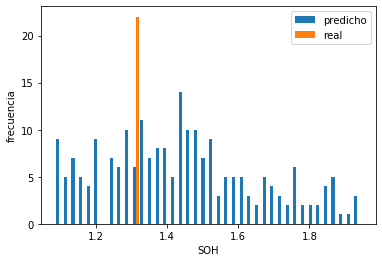

1.4424064499780818 0.2151891808291802
1.3048324907435993 0.0018723205953636167


In [76]:
plt.hist([SOH_predicho, target_test], label=['predicho', 'real'], bins=40)
plt.legend()
plt.xlabel('SOH')
plt.ylabel('frecuencia')
plt.show()

print(np.mean(SOH_predicho[~np.isnan(SOH_predicho)]), np.std(SOH_predicho[~np.isnan(SOH_predicho)]))
print(np.mean(target_test), np.std(target_test))

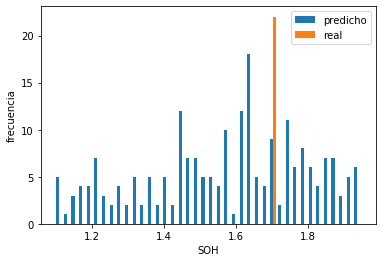

1.5720530391983996 0.22366472852338407
1.7055078254526144 0.0026062757418039693


In [68]:
plt.hist([SOH_predicho, target_test], label=['predicho', 'real'], bins=40)
plt.legend()
plt.xlabel('SOH')
plt.ylabel('frecuencia')
plt.show()

print(np.mean(SOH_predicho[~np.isnan(SOH_predicho)]), np.std(SOH_predicho[~np.isnan(SOH_predicho)]))
print(np.mean(target_test), np.std(target_test))

In [23]:
# X_train.iloc[mas_chicos_index]

In [24]:
print(mas_chicos_index)
print(mas_chicos)

[1579 2209 1587 1916 1683  201 3159  569  603 2822   95  934  309  643
    9 1368 1504 2538 2977 2110 1122 1205 2737 2696 2416  575 1930 1531
  739  305  198 3277 1452 2181 1129  597 3243 2804 3193 2581 1981 3382
 1998 2693 3185 2196 2379 2040 3196 2318 1499  752 3328 2091 1193 2483
 2131  343  992  606 1547 1145  874 1256 1486  770  519 2814  426 3145
  745 3304 2964 2633 2554  629 1995  114 1911 1652 1840 1590 1167  651
   51 1767  688  993 2516 1943  706 2325  546 2519 1719 2509 2505 3153
  789  686]
[0.00331837 0.00361654 0.00506939 0.00546268 0.00650807 0.0087182
 0.00911138 0.01069053 0.01198914 0.01330792 0.01498714 0.01526851
 0.01881045 0.01901011 0.01970919 0.0222999  0.02277623 0.0234677
 0.02356545 0.02468174 0.02630272 0.0266558  0.02728314 0.02829604
 0.02927884 0.02993343 0.03135978 0.03273239 0.03468234 0.03503399
 0.03506645 0.03703704 0.04521695 0.04733502 0.05463092 0.06404663
 0.07529974 0.23091201 0.23459497 0.2383131  0.23957788 0.24038946
 0.24093268 0.24189549 0

In [25]:
mas_chicos_index = np.array(mas_chicos_index, dtype=int)
print(target_train[mas_chicos_index])
print(target_test)

[1.58611897 1.447982   1.58542745 1.49109136 1.54384999 1.89613639
 1.21515365 1.79553778 1.78994456 1.28932748 1.92769652 1.70021022
 1.85910531 1.77377238 1.94627965 1.62529218 1.59243589 1.37415886
 1.24467024 1.46359222 1.65636302 1.63959742 1.31291617 1.32330559
 1.40879713 1.79652397 1.48849563 1.5933306  1.75031197 1.86128748
 1.89490403 1.15003167 1.60430205 1.45256436 1.66038768 1.79307888
 1.19741784 1.2955109  1.21005303 1.36582076 1.49022855 1.14084901
 1.47852806 1.3400563  1.2111395  1.4506592  1.41630051 1.48106769
 1.185989   1.42638764 1.60069074 1.74811797 1.13276454 1.47229465
 1.64874172 1.37428281 1.46086448 1.85037476 1.69733433 1.78759771
 1.5918508  1.6576727  1.71469106 1.6354009  1.59415668 1.74373507
 1.80624849 1.29060603 1.82547267 1.1993879  1.74919651 1.13905406
 1.27337387 1.35785081 1.36965453 1.78048573 1.4874573  1.92224346
 1.49206375 1.54828574 1.51683316 1.5853752  1.6539179  1.7695772
 1.93602373 1.52495104 1.76014796 1.69731235 1.37741801 1.49505